# Data Exploration


This notebook aims to load files and present some data visualization in order to understand the distribution and characteristics of the data, and possibly identify inconsistencies.

Data exploration is one of the most important parts of the machine learning workflow because it allows you to notice any initial patterns in data distribution and features that may inform how to proceed with modeling and clustering the data.

Data exploration uses visual exploration to understand what is in a dataset and the characteristics of the data. These characteristics can include size or amount of data, completeness and correctness of the data, and possible relationships amongst data elements.

In [35]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline
import seaborn as sns
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [38]:
print('Shape',portfolio.shape)
portfolio.info()

Shape (10, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [39]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


segregation the channels into different columns

In [40]:
from sklearn.preprocessing import MultiLabelBinarizer
ml_binarizerobj = MultiLabelBinarizer()
ml_binarizerobj.fit(portfolio['channels'])

channels_df =\
    pd.DataFrame(ml_binarizerobj.transform(portfolio['channels']),
    columns=ml_binarizerobj.classes_)



In [41]:
channels_df.head()

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1


In [42]:
portfolio=pd.concat([portfolio,channels_df],axis=1)

In [43]:
portfolio['duration']=portfolio['duration']* 24

In [44]:
portfolio=portfolio.drop(['channels'],axis=1)

In [45]:
portfolio.head()

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,168,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,120,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,96,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,168,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,240,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


There are three types of offers that can be sent: buy-one-get-one (BOGO), discount, and informational:

In a BOGO offer, a user needs to spend a certain amount to get a reward equal to that threshold amount. In a discount, a user gains a reward equal to a fraction of the amount spent. In an informational offer, there is no reward, but neither is there a requisite amount that the user is expected to spend. Offers can be delivered via multiple channels:

email social media on the web via the Starbucks’s app. Every offer has a validity period (duration) before the offer expires. We see that informational offers have a validity period even though these ads are merely providing information about a product. Here, the duration is the assumed period in which the customer is feeling the influence of the offer after receiving the advertisement.

In [46]:
portfolio.rename(columns={'id': 'offer_id'}, inplace=True)

In [47]:
portfolio.head()

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web
0,10,10,168,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,120,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,96,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,168,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,240,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


<AxesSubplot:xlabel='reward', ylabel='Density'>

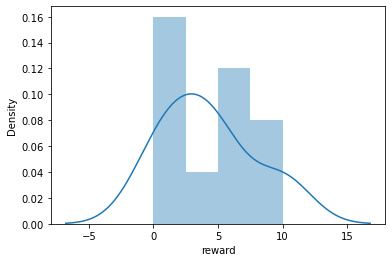

In [48]:
sns.distplot(portfolio['reward'])

<AxesSubplot:xlabel='difficulty', ylabel='Density'>

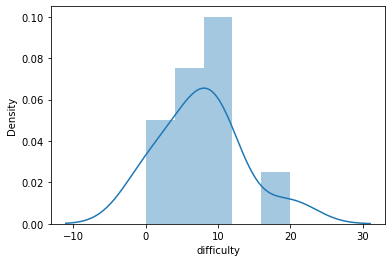

In [49]:
sns.distplot(portfolio['difficulty'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

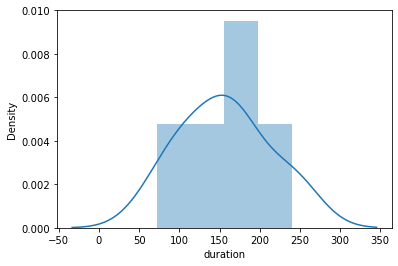

In [50]:
sns.distplot(portfolio['duration'])

# Profile

Dataset containing demographic data for each one of the reward program users

In [51]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [52]:
profile.shape

(17000, 5)

In [53]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [54]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


<AxesSubplot:xlabel='age', ylabel='Density'>

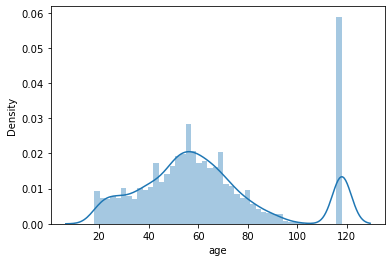

In [55]:
sns.distplot(profile['age'])

1) It looks like age group aboev 18 is considered 
2) 118 age is outlier here(its to be removed)
3)

<AxesSubplot:xlabel='gender', ylabel='count'>

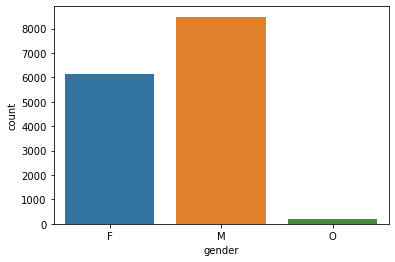

In [56]:
sns.countplot(profile['gender'])

In [57]:
profile[profile['gender'].isna()]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


segregation of 'became_member_on' into year, month, day

In [58]:
profile.dropna(inplace=True)
profile['year']= [str(i)[0:4] for i in profile['became_member_on']]



In [59]:
profile['month']= [str(i)[4:6] for i in profile['became_member_on']]
profile['day']= [str(i)[6:8] for i in profile['became_member_on']]

In [60]:
profile=profile.drop(['became_member_on'],axis=1)
profile.head()

,gender,age,id,income,year,month,day
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,07,15
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,05,09
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018,04,26
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018,02,09
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,11


<AxesSubplot:xlabel='gender', ylabel='income'>

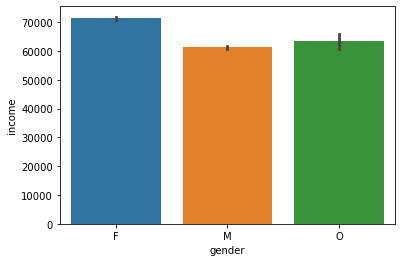

In [64]:
sns.barplot(profile['gender'],profile['income'])

remove the rows where there are missing data and removing outlier range of age

In [65]:
profile = profile[profile['gender'].notna()]
one_hot = pd.get_dummies(profile['gender'])
profile=pd.concat([profile,one_hot],axis=1)
profile=profile.drop(['gender'],axis=1)
profile=profile[profile["age"] != 118]

<AxesSubplot:xlabel='year', ylabel='count'>

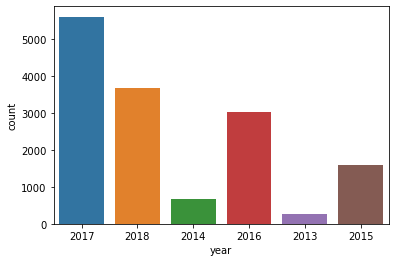

In [66]:
sns.countplot(profile['year'])

<AxesSubplot:xlabel='month', ylabel='count'>

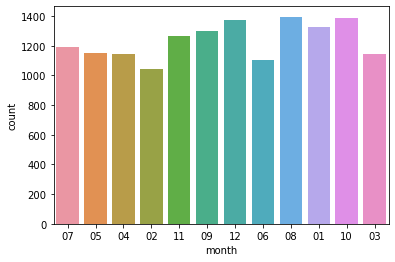

In [67]:
sns.countplot(profile['month'])

In [68]:
profile.head()

,age,id,income,year,month,day,F,M,O
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,07,15,1,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,05,09,1,0,0
5,68,e2127556f4f64592b11af22de27a7932,70000.0,2018,04,26,0,1,0
8,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018,02,09,0,1,0
12,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,11,0,1,0


1) we have group called O apart from M and F

2) two columns data is missing it will higly vraince to impute data for missing data,gender and income missing in the same rows

3) we will remove data for nan values


<AxesSubplot:xlabel='income', ylabel='Density'>

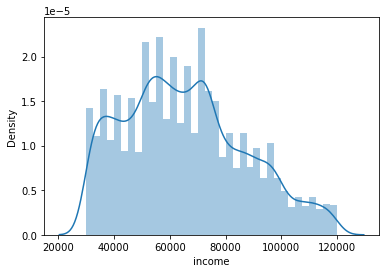

In [69]:
sns.distplot(profile['income'])

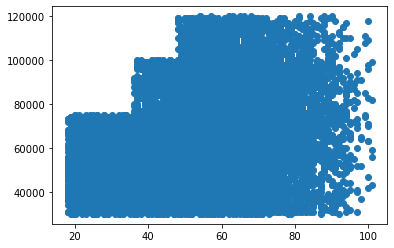

In [70]:
import matplotlib.pyplot as plt
plt.scatter(profile["age"],profile["income"])

In [71]:
from sklearn.preprocessing import robust_scale, quantile_transform, scale


<AxesSubplot:ylabel='Density'>

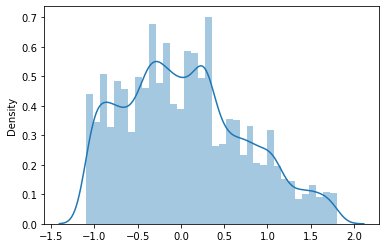

In [72]:
sns.distplot(robust_scale(profile['income']))

# Transcript data set

Event log containing records for transactions, offers received, offers viewed, and offers completed.

In [73]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [74]:
transcript.shape

(306534, 4)

In [75]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [76]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [77]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [78]:
len(transcript['person'].unique())

17000

In [79]:
transcript['offer_id'] = [[*i.values()][0]if [*i.keys()][0] in ['offer id', 'offer_id'] else None for i in transcript['value']]
transcript['amount'] = [[*i.values()][0]if [*i.keys()][0] in ['amount'] else None for i in transcript['value']]
transcript.rename(columns= {'person':'id'},inplace=True)
transcript=transcript.drop(['value'],axis=1)
transcript.head()

,id,event,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


<AxesSubplot:xlabel='amount', ylabel='Density'>

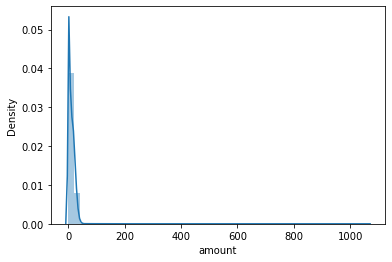

In [80]:
sns.distplot((transcript['amount']))

In [81]:
(transcript['amount'] > 50).sum()

706

In [82]:
((transcript['amount'] < 50) & (transcript['amount'] > 0)).sum()

138247

In [83]:
transcript.describe()

,time,amount
count,306534.000000,138953.000000
mean,366.382940,12.777356
std,200.326314,30.250529
min,0.000000,0.050000
25%,186.000000,2.780000
50%,408.000000,8.890000
75%,528.000000,18.070000
max,714.000000,1062.280000


In [84]:
transcript.head()

,id,event,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [85]:
df_case=pd.merge(transcript,portfolio, on='offer_id', how='left')

In [86]:
df_case=pd.merge(df_case,profile, on='id')

In [87]:
df_case.head()

,id,event,time,offer_id,amount,reward,difficulty,duration,offer_type,email,...,social,web,age,income,year,month,day,F,M,O
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,5.0,168.0,bogo,1.0,...,0.0,1.0,75,100000.0,2017,05,09,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,5.0,168.0,bogo,1.0,...,0.0,1.0,75,100000.0,2017,05,09,1,0,0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,None,19.89,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,75,100000.0,2017,05,09,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,5.0,168.0,bogo,1.0,...,0.0,1.0,75,100000.0,2017,05,09,1,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,None,17.78,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,75,100000.0,2017,05,09,1,0,0


In [88]:
df_case.to_csv('intermediate_file/customer_converted.csv', index=False)